<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Hitori_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Developed by Alireza Soroudi




In [18]:
!pip install ortools
import matplotlib.pyplot as plt
from ortools.sat.python import cp_model
import numpy as np
import calendar
import random
random.seed(42)
import pandas as pd


In [19]:

# Your data
data = [
    [9, 4, 7, 7, 4, 1, 11, 11, 10, 2, 6, 12],
    [6, 4, 1, 8, 9, 5, 12, 3, 5, 11, 7, 10],
    [10, 11, 10, 2, 7, 9, 7, 6, 8, 3, 12, 2],
    [7, 9, 8, 6, 9, 12, 3, 10, 5, 8, 1, 6],
    [4, 1, 6, 11, 8, 5, 4, 10, 6, 12, 5, 9],
    [2, 11, 4, 12, 10, 11, 1, 1, 7, 5, 9, 10],
    [8, 12, 5, 3, 4, 10, 1, 10, 9, 5, 5, 6],
    [5, 8, 11, 12, 12, 8, 5, 7, 4, 10, 3, 1],
    [1, 5, 12, 7, 3, 7, 9, 7, 11, 5, 4, 5],
    [3, 7, 6, 10, 1, 4, 6, 5, 2, 1, 2, 8],
    [10, 5, 2, 11, 1, 3, 7, 3, 6, 9, 3, 4],
    [1, 8, 3, 4, 3, 6, 2, 9, 1, 2, 7, 7]
]



data1 = [
    [9, 4, 7, 7, 4, 1, 11, 11, 10, 2, 6, 12],
    [6, 4, 1, 8, 9, 5, 12, 3, 5, 11, 7, 10],
    [10, 11, 10, 2, 7, 9, 7, 6, 8, 3, 12, 2],
    [7, 9, 8, 6, 9, 12, 3, 10, 5, 8, 1, 6],
    [4, 1, 6, 11, 8, 5, 4, 10, 6, 12, 5, 9],
    [2, 11, 4, 12, 10, 11, 1, 1, 7, 5, 9, 10],
    [8, 12, 5, 3, 4, 10, 1, 10, 9, 5, 5, 6],
    [5, 8, 11, 12, 12, 8, 5, 7, 4, 10, 3, 1],
    [1, 5, 12, 7, 3, 7, 9, 7, 11, 5, 4, 5],
    [3, 7, 6, 10, 1, 4, 6, 5, 2, 1, 2, 8],
    [10, 5, 2, 11, 1, 3, 7, 3, 6, 9, 3, 4],
    [1, 8, 3, 4, 3, 6, 2, 9, 1, 2, 7, 7]
]
data1 = [
    [12, 11, 6, 1, 9, 2, 11, 5, 8, 7, 15, 14, 1, 3, 4],
    [14, 8, 4, 5, 5, 8, 2, 13, 4, 12, 1, 3, 14, 10, 3],
    [3, 10, 12, 14, 2, 15, 5, 4, 7, 8, 2, 9, 7, 6, 1],
    [13, 4, 14, 8, 2, 11, 15, 2, 12, 1, 11, 9, 6, 9, 4],
    [2, 6, 15, 3, 4, 14, 1, 12, 14, 2, 5, 8, 5, 8, 10],
    [1, 14, 8, 12, 3, 8, 7, 10, 6, 2, 3, 1, 15, 13, 2],
    [6, 10, 2, 2, 14, 10, 9, 8, 11, 5, 8, 1, 4, 8, 13],
    [11, 9, 8, 15, 12, 4, 3, 11, 1, 13, 10, 4, 12, 1, 6],
    [8, 5, 7, 9, 6, 11, 4, 6, 10, 7, 2, 6, 1, 7, 12],
    [12, 1, 10, 2, 11, 4, 2, 8, 14, 3, 2, 7, 13, 15, 3],
    [15, 2, 12, 2, 2, 9, 7, 2, 5, 10, 3, 13, 11, 8, 9],
    [4, 13, 10, 10, 8, 3, 6, 2, 1, 15, 9, 11, 13, 14, 7],
    [8, 7, 3, 6, 5, 13, 10, 7, 9, 11, 14, 12, 8, 2, 4],
    [10, 15, 4, 13, 7, 3, 14, 9, 14, 11, 11, 2, 3, 5, 8],
    [13, 12, 1, 8, 10, 4, 8, 14, 15, 3, 5, 6, 13, 4, 3]
]

# Create DataFrame with column names
df = pd.DataFrame(data, columns=[f"C{i+1}" for i in range(len(data[0]))])

print(df)

#plt.rcParams["figure.figsize"] = (15,10)

    C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C12
0    9   4   7   7   4   1  11  11  10    2    6   12
1    6   4   1   8   9   5  12   3   5   11    7   10
2   10  11  10   2   7   9   7   6   8    3   12    2
3    7   9   8   6   9  12   3  10   5    8    1    6
4    4   1   6  11   8   5   4  10   6   12    5    9
5    2  11   4  12  10  11   1   1   7    5    9   10
6    8  12   5   3   4  10   1  10   9    5    5    6
7    5   8  11  12  12   8   5   7   4   10    3    1
8    1   5  12   7   3   7   9   7  11    5    4    5
9    3   7   6  10   1   4   6   5   2    1    2    8
10  10   5   2  11   1   3   7   3   6    9    3    4
11   1   8   3   4   3   6   2   9   1    2    7    7


- No number should appear unshaded more than once in a row or a column.
- 2 black cells cannot be adjacent horizontally or vertically.
- All non-shaded cells should be connected in a single group by vertical or horizontal motion.

In [20]:
nr, nc, = len(data), len(data[0])
print(nr,nc)
data = {}
n = 0
for r in range(nr):
  for c in range(nc):
    data[n] = [r,c, int(df.iloc[r,c])]
    n+=1

def dist(n,m):
  return np.sqrt((data[n][0] - data[m][0])**2 + (data[n][1] - data[m][1])**2)

cells = [i for i in data]

adjacent = [(n,m) for n in cells for m in cells if dist(n,m) == 1]


12 12


In [21]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {n:model.NewBoolVar(f"assign_{n}") for n in cells}

source_select = {n:model.NewBoolVar(f"source_sel{n}") for n in cells}
source = {n:model.NewIntVar(0, nr*nc, f"source{n}") for n in cells}
flow = {(n,m):model.NewIntVar(0, nr*nc, f"flow_{n}_{m}") for (n,m) in adjacent}

for n in cells:
  model.Add( source[n] - (1-U[n])  == sum(flow[n,m]-flow[m,n] for m in cells if (n,m) in adjacent) )
  model.Add( source[n] == 0 ).OnlyEnforceIf(source_select[n].Not())
  model.Add( source[n] == 0 ).OnlyEnforceIf(U[n])

expr = [source_select[n] for n in cells]
model.AddExactlyOne(expr)

for (n,m) in adjacent:
    model.AddAtMostOne([U[n], U[m]])
    model.Add(flow[n,m] == 0).OnlyEnforceIf(U[n])
    model.Add(flow[n,m] == 0).OnlyEnforceIf(U[m])


for r in range(nr):
  all_numbers = [data[n][2] for n in cells if data[n][0]==r ]
  all_unique_numbers = set(all_numbers)
  if len(all_numbers) != len(all_unique_numbers):
    chek_numbers = [v1 for v1 in all_unique_numbers if all_numbers.count(v1) > 1]

    for v2 in chek_numbers:
      expr_r = [U[n].Not() for n in cells if data[n][0]==r and data[n][2]==v2 ]
      model.AddAtMostOne(expr_r)

for c in range(nc):
  all_numbers = [data[n][2] for n in cells if data[n][1]==c ]
  all_unique_numbers = set(all_numbers)
  if len(all_numbers) != len(all_unique_numbers):
    chek_numbers = [v1 for v1 in all_unique_numbers if all_numbers.count(v1) > 1]
    for v2 in chek_numbers:
      expr_c = [U[n].Not() for n in cells if data[n][1]==c and data[n][2]==v2 ]
      model.AddExactlyOne(expr_c)

solver.parameters.max_time_in_seconds = 60
stat = solver.Solve(model)
print( solver.status_name(stat) )

OPTIMAL


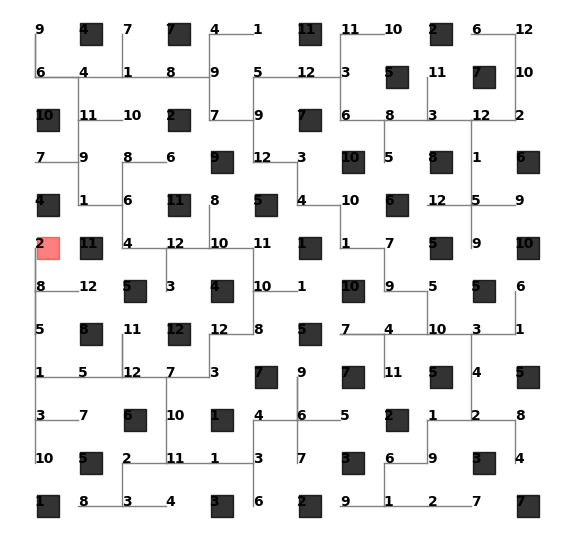

In [22]:
# --- Visualization with scatter ---
plt.figure(figsize=(7, 7))
ybias=0.3
bias = nr
for n,v in U.items():
  if solver.value(v):
    x,y,val = data[n][0], data[n][1], data[n][2]
    plt.scatter(y+ybias,bias-x, s=250, marker="s", edgecolors="black", c = 'k', alpha=0.8)
  else:
    x,y,val = data[n][0], data[n][1], data[n][2]
  plt.text(y,bias-x, s=str(data[n][2]), c = 'k', fontweight = 'bold')
  if solver.value(source_select[n]):
    plt.scatter(y+ybias,bias-x, s=250, marker="s", edgecolors="r", c = 'r', alpha=0.5)

for (n,m),v in flow.items():
  if solver.value(v):
    x1,y1,val1 = data[n][0], data[n][1], data[n][2]
    x2,y2,val2 = data[m][0], data[m][1], data[m][2]
    plt.plot([y1,y2], [bias-x1,bias-x2],lw=1, c ='grey', zorder=-2)
plt.xticks(range(nc ), rotation=0)
plt.yticks(range(nr))
plt.grid(alpha=0.4)
plt.axis('off')
plt.show()

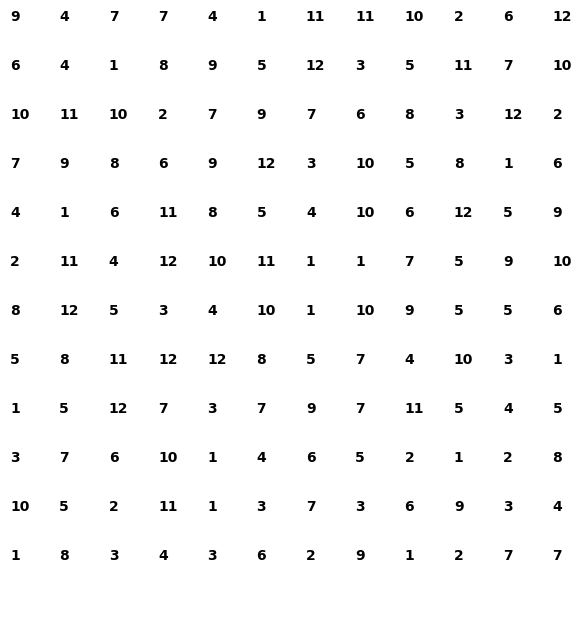

In [23]:
# --- Visualization with scatter ---
plt.figure(figsize=(7, 7))
ybias=0.3
bias = nr
for n,v in U.items():
  if solver.value(v):
    x,y,val = data[n][0], data[n][1], data[n][2]
    #plt.scatter(y+ybias,bias-x, s=250, marker="s", edgecolors="black", c = 'k', alpha=0.8)
  else:
    x,y,val = data[n][0], data[n][1], data[n][2]
  plt.text(y,bias-x, s=str(data[n][2]), c = 'k', fontweight = 'bold')
  #if solver.value(source_select[n]):
  #  plt.scatter(y+ybias,bias-x, s=250, marker="s", edgecolors="r", c = 'r', alpha=0.5)

for (n,m),v in flow.items():
  if solver.value(v):
    x1,y1,val1 = data[n][0], data[n][1], data[n][2]
    x2,y2,val2 = data[m][0], data[m][1], data[m][2]
    #plt.plot([y1,y2], [bias-x1,bias-x2],lw=1, c ='grey', zorder=-2)
plt.xticks(range(nc ), rotation=0)
plt.yticks(range(nr))
plt.grid(alpha=0.4)
plt.axis('off')
plt.show()